In [ ]:
import matplotlib.pyplot as plt
import os

from plotters import *

In [ ]:
######## Set the environment variable in the Python environment (if haven't done already) ########
# os.environ['RL_CMAES_ROOT'] = '/path/to/RL_CMAES/root'

path = os.environ['RL_CMAES_ROOT']

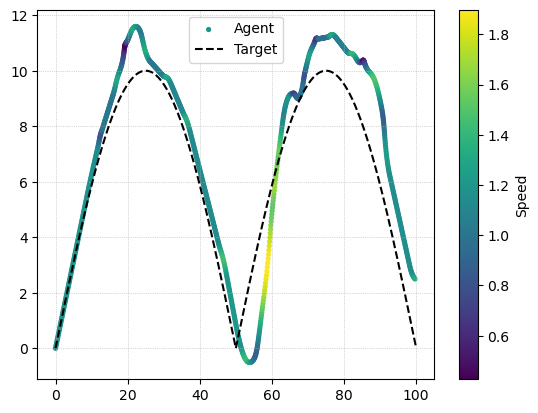

In [53]:
plot_result_and_trajectory(path + '/trajectories/sawtooth.csv', path + '/sim_results/train.csv', coloring='speed')
plt.grid(ls=':', lw=0.5)

plt.show()

In [54]:
generate_animation(path + '/trajectories/sawtooth.csv', path + '/sim_results/train.csv', path + '/sim.gif')

<Axes: >

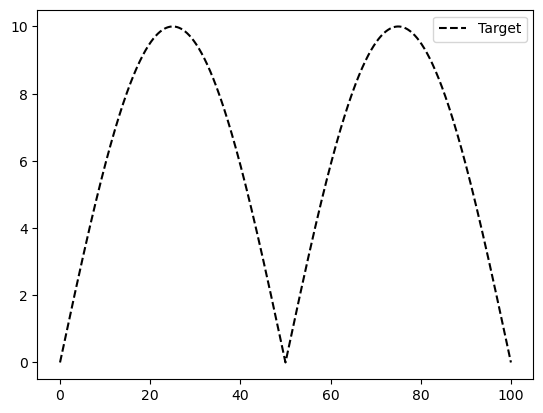

In [52]:
plot_trajectory(path + '/trajectories/sawtooth.csv')